### I took some time to go through the data and figure out how we can work with it in python, if you see any errors or encounter any errors let me know, and we can figure them out togother. I tried adding comments that would make it easier to follow my work.

### Most of this exploration notebook was dervied from a few different sources:
#### 1. The youtuber "sentdex" created a video series playlist (check out episodes 2 & 3) that detailed a first pass for the 2017 data science bowl (also hosted on kaggle). This project had more do do with predicting lung cancer but I feel these tutorials are great for learning about how to work with the dicom files.
#### 2. The full preprocessing tutorial for the Data Science Bowl 2017 includes great information on more advanced processing of the dicom files and will probably be necessary later on in the project, for now I tried to keep things simple in the code below.
#### 3. Pulmonary Dicom Preprocessing notebook for our project on kaggle, while the two previous sources are great for working with dicom files, that project was based around binary classification ("Cancer" or "No Cancer") and ours seem to have a few more variables we will have to consider.

### Sources
#### 1. https://www.youtube.com/watch?v=ulq9DjCJPDU&list=PLQVvvaa0QuDd5meH8cStO9cMi98tPT12_
#### 2. https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
#### 3. https://www.kaggle.com/allunia/pulmonary-dicom-preprocessing

### Dont forget, you'll need to install the following packages to work with these files
#### For those using Pip:
##### pip install jupyter, matplotlib, pydicom

#### For those working in an anaconda environment, I think you'll only need pydicom

##### conda install pydicom

##### note: if you are working with virtual enviroments it will be: conda install pydicom environment_name

 

In [1]:
import matplotlib # for visualizing the Dicom files
import pydicom    # for getting info/ managing the dicom files
import os         # for directrory operations and file management
import matplotlib.pyplot as plt #also for visualizing

In [2]:
data_dir = 'D:/osic-pulmonary-fibrosis-progression/train/' # where my dicom images are stored (had to use forward slash or I had issues - also don't forget forward slash at the end)
patients = os.listdir(data_dir) # creates a list of all folders in the directory effectivly creating a list of patients


In [3]:
print(f'Total # of patients: {len(patients)}')

Total # of patients: 172


### Creating a visual of our first patient (P1)

In [4]:
P1 = patients[0] # select first patient
P1 # see unique ID of patient

'ID00007637202177411956430'

In [5]:
path = data_dir + P1 
path #the path of where patient 1's dicom files are stored

'D:/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430'

In [6]:
slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)] 

'''What the above does: 
            1. gets a list of all of the dicom files in patient 1's foler
            2. reads each file with the pydicom package (as you'll see below each file has important attributes)
            3. appends the attributes for each to a list called slices'''

'''Lets take a look at the information associated with the first item in the slices list which is also
    the information for the file "D:\osic-pulmonary-fibrosis-progression\train\ID00007637202177411956430\1.dcm"
    (our first dicom file for patient 1)'''

slices[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

#### As we can see above there is a significant amount of data associated with each file and not all of it is really important (who cares about the Manufacturer, etc)

#### Some things that are going to be important are the len(slices) and the attributes "Rows", "Columns" (which can also be expressed as slices[0].pixel_array.shape)


In [7]:
#Lets take a look at the attributes meantioned above for our patient 1
print(len(slices), slices[0].pixel_array.shape)

#what the below output shows is that we have a 512 px by 512 px with 30 slices


30 (512, 512)


In [13]:
%%time 
#I am curious to see how long it will take to process the code below... ignore this


#Lets take a look and see if our first 10 patients all have the same dimensions, I made a for loop
# with some of the code seen earlier to get the dimensions.

for patient in patients[:10]:
    path = data_dir + patient #seen earlier
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)] #seen earlier
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # **see below
    print(len(slices), slices[0].pixel_array.shape) #seen earlier
    
# **That lamba funtion sorts the dicom images in the proper order, apperently they are not in order.
# Also I am not really an expert on lambda functions and they are confusing to me... but it works
# I got that from sentdex but the original code didn't work and I had to add float (found by researching).

30 (512, 512)
394 (768, 768)
106 (512, 512)
49 (512, 512)
31 (843, 888)
295 (768, 768)
29 (512, 512)
493 (512, 512)
27 (512, 512)
24 (768, 768)
Wall time: 2 s


#### While it is not a problem now, our data will later have to be resized so that all patients have similar sized dicom datasets, perhaps something like  30 (50,50)   (30 slices that are 50 px by 50 px) but lets figure that out later and move on to the fun part: visualizing.

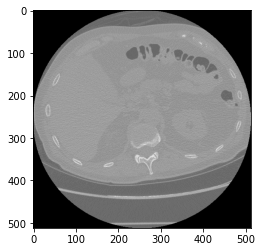

In [9]:
# we will essentially use the same code as above but with a few more lines, again lets look only at patient 1.
for patient in patients[:1]:
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    plt.imshow(slices[0].pixel_array, cmap = "gray")
    plt.show()
# intersting... I am definatly not a doctor because idk what I am looking at
# Lets plot the other images

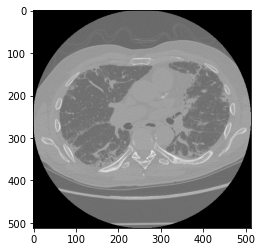

In [10]:
#lets look at the last slice for patient 1
for patient in patients[:1]:
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # * see below
    plt.imshow(slices[14].pixel_array, cmap = "gray")
    plt.show()
    

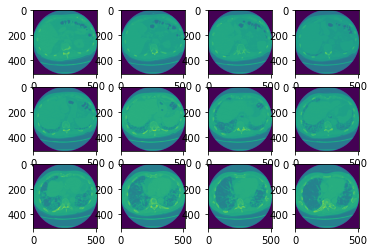

In [11]:
#the below will plot several of the slices at once
# the color doesn't really matter, I just forgot to add cmap = "gray" in plt.imshow()

fig = plt.figure()
for num, each_slice in enumerate(slices[:12]): # I would plot all but apparently matplotlib can only do 12
    y = fig.add_subplot(3,4, num+1)
    y.imshow(each_slice.pixel_array)
plt.show()
#well they definatly look different...
# the ones on the bottom seem to looks kind of like lungs

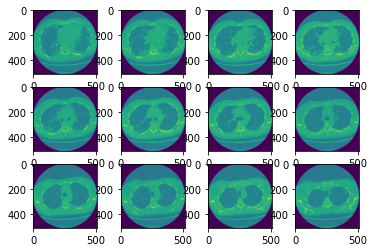

In [12]:
# plotting the next 12 images
fig = plt.figure()
for num, each_slice in enumerate(slices[12:24]): # I would plot all but apparently matplotlib can only do 12
    y = fig.add_subplot(3,4, num+1)
    y.imshow(each_slice.pixel_array)
plt.show()
# Looks more like lungs to me

#### whats next? well we can take a look at the patient data supplied in the csv, do some 3D visuals based on the sources mentioned in the beginning, or we can keep exploring other patients.
##### more to come later on